In [ ]:
import optuna
from matplotlib import pyplot as plt
import math

USE_POSTGRES = True  # Set to True to use PostgreSQL, False for SQLite
POSTGRES_CONFIG = {
    'host': 'localhost',
    'port': 5432,
    'database': 'optuna_db',
    'user': 'optuna_user',
    'password': 'optuna_password'
}

def get_valid_studies(storage_name, compressor_model):
    studies = optuna.get_all_study_names(storage=storage_name)
    valid_studies = []
    for study in studies:
        if study.startswith(f"RunIn_") and study.endswith(f"_{compressor_model}"):
            valid_studies.append(study)
    return valid_studies

def plot_pareto_studies(studies, storage_name):
    fig, ax = plt.subplots(figsize=(8, 6))
    colors = plt.cm.get_cmap('tab10', len(studies))

    for idx, study_name in enumerate(studies):
        study = optuna.load_study(study_name=study_name, storage=storage_name)
        pareto_trials = study.best_trials

        # Assume two objectives: values[0] and values[1]
        pareto_x = [t.values[0] for t in pareto_trials]
        pareto_y = [t.values[1] for t in pareto_trials]

        # Order pareto_x and pareto_y by pareto_x
        ordered = sorted(zip(pareto_x, pareto_y))
        pareto_x, pareto_y = zip(*ordered) if ordered else ([], [])

        ax.plot(pareto_x, pareto_y, marker='o', linestyle='-', color=colors(idx), label=study_name)

    ax.set_xlabel("MCC")
    ax.set_ylabel("% labeled")
    ax.set_title("Pareto Fronts for All Studies")
    ax.legend()

    plt.tight_layout()
    plt.show()

# Get database URL (SQLite or PostgreSQL)
storage_name = (f"postgresql://{POSTGRES_CONFIG['user']}:{POSTGRES_CONFIG['password']}"
                f"@{POSTGRES_CONFIG['host']}:{POSTGRES_CONFIG['port']}"
                f"/{POSTGRES_CONFIG['database']}")      

def plot_by_compressor(compressor_model):
    studies = get_valid_studies(storage_name, compressor_model)
    if not studies:
        print(f"No valid studies found for compressor model: {compressor_model}")
        return
    plot_pareto_studies(studies, storage_name)  

/tmp/ipykernel_6577/3487421293.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab10', len(studies))


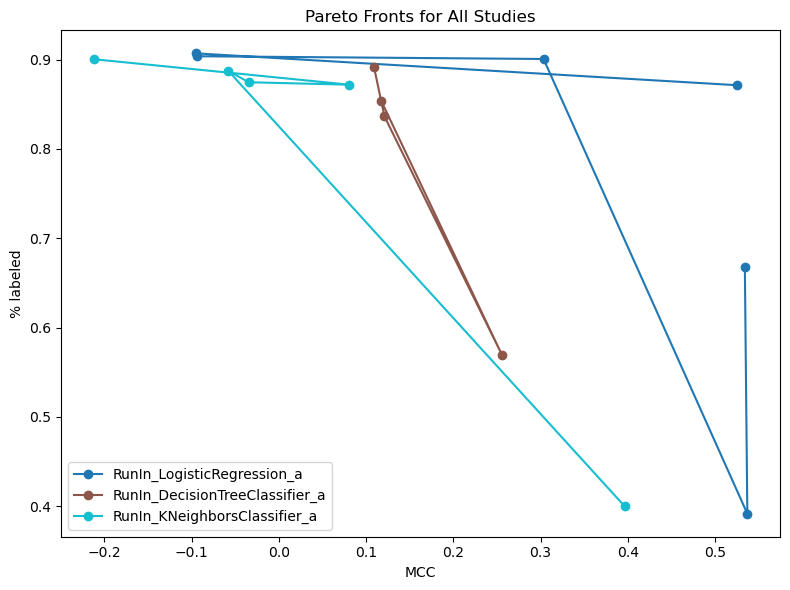

In [9]:
plot_by_compressor("a")

In [10]:
plot_by_compressor("b")

No valid studies found for compressor model: b
